# importing libraries

In [485]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [486]:
fee = pd.read_csv('fees_data.csv')

In [487]:
fee

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [488]:
fee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


### Observation
data is present in object format, we need to encode every column for the model training.
we have plenty of data in which plenty of qualifications, plenty of places, plenty of profile, plenty of feedbacks

# Data preprocessing

In [489]:
fee.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

<AxesSubplot:>

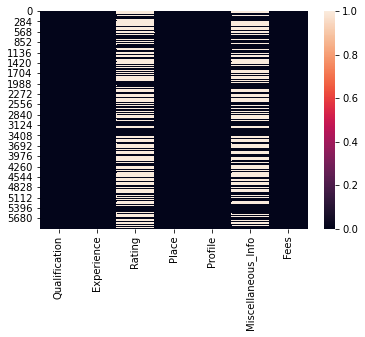

In [490]:
sns.heatmap(fee.isnull())

In [491]:
fee['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [492]:
for i in fee.columns:
    print(fee[i].unique())
    print('\n')

['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']


['24 years experience' '12 years experience' '9 years experience'
 '20 years experience' '8 years experience' '42 years experience'
 '10 years experience' '14 years experience' '23 years experience'
 '5 years experience' '7 years experience' '21 years experience'
 '19 years experience' '41 years experience' '31 years experience'
 '25 years experience' '16 years experience' '15 years experience'
 '11 years experience' '22 years experience' '38 years experience'
 '6 years experience' '36 years experience' '13 years experience'
 '18 years experience' '46 years experience' '40 years experience'
 '49 years experience' '33 years experience' '0 years expe

In [493]:
fee.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [494]:
for i in fee.columns:
    print(fee[i].value_counts())
    print('\n')

BDS                                                                                    488
BHMS                                                                                   477
BAMS                                                                                   471
MBBS                                                                                   334
MBBS, MS - ENT                                                                         220
                                                                                      ... 
MBBS, FCD - Diabetology, MD - General Medicine                                           1
MBBS, FRGUHS, MD - Dermatology , Venereology & Leprosy                                   1
MD - Ayurveda Medicine, MBA, Post Graduate Diploma in Clinical Research (PGDCR)          1
BDS, Certification in Full Mouth Rehabilitation, Certificate in Dental Implants          1
BHMS, One Year Certificate course in Hospital Management , Certified Course in Yoga      1

## NOTE-: 
first we encode experience column

In [495]:
exp = []
for i in fee['Experience']:
    exp.append(int(i.split()[0]))
exp

[24,
 12,
 9,
 12,
 20,
 8,
 42,
 10,
 14,
 23,
 5,
 7,
 9,
 21,
 12,
 10,
 24,
 5,
 19,
 19,
 21,
 14,
 41,
 31,
 23,
 5,
 25,
 12,
 16,
 15,
 7,
 11,
 14,
 23,
 9,
 15,
 10,
 12,
 31,
 16,
 8,
 12,
 31,
 8,
 22,
 7,
 16,
 31,
 8,
 10,
 42,
 9,
 22,
 10,
 9,
 25,
 14,
 11,
 24,
 38,
 8,
 12,
 14,
 5,
 22,
 14,
 6,
 36,
 6,
 13,
 13,
 11,
 18,
 46,
 41,
 40,
 7,
 13,
 12,
 10,
 49,
 9,
 20,
 11,
 10,
 16,
 24,
 33,
 10,
 36,
 8,
 0,
 15,
 7,
 12,
 12,
 13,
 24,
 27,
 12,
 9,
 16,
 22,
 20,
 30,
 52,
 13,
 19,
 16,
 10,
 60,
 12,
 11,
 15,
 6,
 5,
 9,
 21,
 7,
 20,
 10,
 12,
 12,
 26,
 31,
 15,
 11,
 11,
 5,
 24,
 13,
 12,
 5,
 8,
 8,
 35,
 24,
 14,
 19,
 34,
 21,
 13,
 39,
 35,
 36,
 19,
 10,
 7,
 32,
 18,
 17,
 9,
 5,
 20,
 9,
 35,
 17,
 6,
 10,
 5,
 36,
 19,
 11,
 12,
 17,
 18,
 7,
 14,
 0,
 12,
 28,
 9,
 18,
 28,
 16,
 7,
 11,
 27,
 18,
 32,
 32,
 12,
 15,
 58,
 17,
 13,
 5,
 20,
 31,
 10,
 42,
 13,
 27,
 4,
 16,
 18,
 15,
 5,
 11,
 26,
 14,
 6,
 27,
 8,
 9,
 15,
 7,
 14,
 45,
 21,


In [496]:
fee['Experience'] = exp

In [497]:
fee.head(3)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300


### encoding ['profile']

In [498]:
profile_df = pd.get_dummies(fee['Profile'])

In [499]:
profile_df

,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
5956,0,0,0,1,0,0
5957,0,0,0,0,1,0
5958,0,0,0,0,1,0
5959,0,0,0,0,1,0


In [500]:
fee = pd.concat([fee,profile_df], axis =1 )
fee.head(3)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,0,0,1
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,1,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,0,0,0,1,0,0


In [501]:
# we can drop profile column now
fee.drop('Profile', axis =1, inplace=True)

### encoding rating

In [502]:
fee.iloc[90:95,:]

,Qualification,Experience,Rating,Place,Miscellaneous_Info,Fees,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
90,"BAMS, Post Graduate Diploma in Emergency Servi...",8,NaN,"Dahisar West, Mumbai",NaN,50,1,0,0,0,0,0
91,Get inspired by remarkable stories of people l...,0,NaN,NaN,NaN,100,0,0,1,0,0,0
92,"BAMS, MD - Acupuncture, Master of Hospital Adm...",15,NaN,"Anna Nagar East, Chennai",NaN,250,1,0,0,0,0,0
93,"BDS, MDS - Periodontology and Oral Implantology",7,100%,"Andheri West, Mumbai",Dental Implant Fixing Flap Surgery Gum Disease...,200,0,1,0,0,0,0
94,"BDS, MDS - Conservative Dentistry & Endodontic...",12,100%,"Bandra West, Mumbai",Impaction / Impacted Tooth Extraction Conserva...,500,0,1,0,0,0,0


In [503]:
# place column has some nan values to it so lets fix that problem later
# we will fix first rating and miscellaneous columns which have more number of nan values

In [504]:
fee['Rating']

0       100%
1        98%
2        NaN
3        NaN
4       100%
        ... 
5956     98%
5957     NaN
5958     97%
5959     90%
5960    100%
Name: Rating, Length: 5961, dtype: object

* data type is object, first we need to fill nan, then need to remove percentage sign and then convert it to numeric.

In [505]:
fee['Rating'][0].split('%')[0]

'100'

In [506]:
fee['Rating'] = fee['Rating'].fillna('0')

In [507]:
rating = []
for i in fee['Rating']:
    rating.append(int(i.split('%')[0])/10)

In [508]:
len(rating)

5961

In [509]:
fee['Rating'] = rating

In [510]:
fee.head()

,Qualification,Experience,Rating,Place,Miscellaneous_Info,Fees,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,"BHMS, MD - Homeopathy",24,10.0,"Kakkanad, Ernakulam","100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,0,0,1
1,"BAMS, MD - Ayurveda Medicine",12,9.8,"Whitefield, Bangalore","98% 76 Feedback Whitefield, Bangalore",350,1,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,0.0,"Mathikere - BEL, Bangalore",NaN,300,0,0,0,1,0,0
3,"BSc - Zoology, BAMS",12,0.0,"Bannerghatta Road, Bangalore","Bannerghatta Road, Bangalore ?250 Available on...",250,1,0,0,0,0,0
4,BAMS,20,10.0,"Keelkattalai, Chennai","100% 4 Feedback Keelkattalai, Chennai",250,1,0,0,0,0,0


In [511]:
fee_ = fee.copy()

In [512]:
fee['Place'] = fee['Place'].fillna('unknown,unknown')

In [513]:
place=[]
for i in fee['Place']:
    place.append(i.split(',').pop())
place

[' Ernakulam',
 ' Bangalore',
 ' Bangalore',
 ' Bangalore',
 ' Chennai',
 ' Chennai',
 ' Delhi',
 ' Bangalore',
 ' Hyderabad',
 ' Ernakulam',
 ' Chennai',
 ' Hyderabad',
 ' Coimbatore',
 ' Hyderabad',
 ' Delhi',
 ' Hyderabad',
 ' Chennai',
 ' Chennai',
 ' Hyderabad',
 ' Bangalore',
 ' Coimbatore',
 ' Delhi',
 ' Mumbai',
 ' Ernakulam',
 ' Mumbai',
 ' Thiruvananthapuram',
 ' Bangalore',
 ' Hyderabad',
 ' Coimbatore',
 ' Delhi',
 ' Hyderabad',
 ' Mumbai',
 ' Delhi',
 ' Chennai',
 ' Delhi',
 ' Delhi',
 ' Delhi',
 ' Mumbai',
 ' Delhi',
 ' Mumbai',
 ' Hyderabad',
 ' Mumbai',
 ' Bangalore',
 ' Hyderabad',
 ' Mumbai',
 ' Hyderabad',
 ' Hyderabad',
 ' Hyderabad',
 ' Hyderabad',
 ' Coimbatore',
 ' Hyderabad',
 ' Chennai',
 ' Hyderabad',
 ' Mumbai',
 ' Hyderabad',
 ' Bangalore',
 ' Bangalore',
 ' Bangalore',
 ' Chennai',
 ' Bangalore',
 ' Chennai',
 ' Hyderabad',
 ' Delhi',
 ' Delhi',
 ' Delhi',
 ' Bangalore',
 ' Mumbai',
 ' Hyderabad',
 ' Chennai',
 ' Delhi',
 ' Delhi',
 ' Delhi',
 ' Mumbai',
 '

In [514]:
fee['Place']=place

In [515]:
fee['Place'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'unknown', 'e'],
      dtype=object)

In [516]:
fee['Place'].replace(to_replace='e',value='unknown',inplace=True)

In [517]:
fee['Place'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'unknown'],
      dtype=object)

In [518]:
place_ = pd.get_dummies(fee['Place'])

In [519]:
place_

,Bangalore,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram,unknown
0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
5956,1,0,0,0,0,0,0,0,0
5957,0,1,0,0,0,0,0,0,0
5958,0,0,0,1,0,0,0,0,0
5959,0,0,0,0,0,0,1,0,0


In [520]:
fee_new = pd.concat([fee,place_], axis =1 )
fee_new.head(3)

,Qualification,Experience,Rating,Place,Miscellaneous_Info,Fees,Ayurveda,Dentist,Dermatologists,ENT Specialist,...,Homeopath,Bangalore,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram,unknown
0,"BHMS, MD - Homeopathy",24,10.0,Ernakulam,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12,9.8,Bangalore,"98% 76 Feedback Whitefield, Bangalore",350,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,0.0,Bangalore,NaN,300,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [521]:
fee['Qualification'].value_counts().head(60)

BDS                                                      488
BHMS                                                     477
BAMS                                                     471
MBBS                                                     334
MBBS, MS - ENT                                           220
MBBS, MD - Dermatology                                   178
MBBS, MD - General Medicine                              177
MBBS, MD - Dermatology , Venereology & Leprosy           140
BHMS, MD - Homeopathy                                     93
MBBS, DDVL                                                92
MBBS, Diploma in Otorhinolaryngology (DLO)                84
BAMS, MD - Ayurveda Medicine                              82
BDS, MDS - Conservative Dentistry & Endodontics           68
MBBS, DDV                                                 66
BDS, MDS                                                  63
BDS, MDS - Oral & Maxillofacial Surgery                   57
MD - Dermatology , Vener

* 'BDS', 'BHMS', 'BAMS', 'MBBS', 'MS', 'MD', 'DDVL', 'MDS', 'DDV','ENT' , 'DGO'
* these are thee most common qualification count present and we will use these to make features to make better model prediction.
* we will make function to separate and build features.

In [522]:
def seprator(lst,str):
    for data in col:
        if data.find(str) != -1:
            lst.append(int(1))
        else:
            lst.append(int(0))

In [523]:
col = fee['Qualification']

In [524]:
bds = []
bhms = []
bams = []
mbbs = []
ms = []
md = []
ddvl = []
mds = []
ddv = []
ent = []
dgo = []

In [525]:
seprator(bds,'BDS')
seprator(bhms,'BHMS')
seprator(bams, 'BAMS')
seprator(mbbs, 'MBBS')
seprator(ms, 'MS')
seprator(md, 'MD')
seprator(ddvl, 'DDVL')
seprator(mds, 'MDS')
seprator(ddv, 'DDV')
seprator(ent, 'ENT')
seprator(dgo, 'DGO')

In [526]:
bds = pd.DataFrame(data = bds, columns = ['BDS'])
bhms = pd.DataFrame(data = bhms, columns = ['BHMS'])
bams = pd.DataFrame(data = bams, columns = ['BAMS'])
mbbs = pd.DataFrame(data = mbbs, columns = ['MBBS'])
ms = pd.DataFrame(data = ms, columns = ['MS'])
md = pd.DataFrame(data=md, columns=['MD'])
ddvl = pd.DataFrame(data=ddvl, columns=['DDVL'])
mds = pd.DataFrame(data = mds, columns=['MDS'])
ddv = pd.DataFrame(data=ddv, columns=['DDV'])
ent = pd.DataFrame(data=ent, columns= ['ENT'])
dgo = pd.DataFrame(data=dgo,columns= ['DGO'])

In [527]:
qual = pd.concat([bds,bhms,bams,mbbs,ms,md,ddvl,mds,ddv,ent,dgo], axis =1)

In [528]:
qual

,BDS,BHMS,BAMS,MBBS,MS,MD,DDVL,MDS,DDV,ENT,DGO
0,0,1,0,0,1,1,0,0,0,0,0
1,0,0,1,0,1,1,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5956,0,0,0,1,1,0,0,0,0,1,0
5957,0,0,0,1,0,0,0,0,0,0,0
5958,0,0,0,1,0,0,0,0,0,0,0
5959,0,0,0,1,0,1,0,0,0,0,0


In [529]:
fee_new = pd.concat([fee_new, qual, place_], axis =1)

In [530]:
fee_new.head(3)

,Qualification,Experience,Rating,Place,Miscellaneous_Info,Fees,Ayurveda,Dentist,Dermatologists,ENT Specialist,...,DGO,Bangalore,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram,unknown
0,"BHMS, MD - Homeopathy",24,10.0,Ernakulam,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12,9.8,Bangalore,"98% 76 Feedback Whitefield, Bangalore",350,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,0.0,Bangalore,NaN,300,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


### we can drop qualification column as we derive doctor specialisation according to the profile
### we can miscellaneous column as we grab ratings and almost 45-50% data contains feedback.

In [531]:
#fee_new.drop(['Qualification','Miscellaneous_Info'], axis = 1, inplace= True)

In [532]:
fee_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Qualification        5961 non-null   object 
 1   Experience           5961 non-null   int64  
 2   Rating               5961 non-null   float64
 3   Place                5961 non-null   object 
 4   Miscellaneous_Info   3341 non-null   object 
 5   Fees                 5961 non-null   int64  
 6   Ayurveda             5961 non-null   uint8  
 7   Dentist              5961 non-null   uint8  
 8   Dermatologists       5961 non-null   uint8  
 9   ENT Specialist       5961 non-null   uint8  
 10  General Medicine     5961 non-null   uint8  
 11  Homeopath            5961 non-null   uint8  
 12   Bangalore           5961 non-null   uint8  
 13   Chennai             5961 non-null   uint8  
 14   Coimbatore          5961 non-null   uint8  
 15   Delhi               5961 non-null   u

# data visualisation

In [533]:
fee_new.describe()

,Experience,Rating,Fees,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Bangalore,...,DGO,Bangalore,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram,unknown
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,...,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,17.303976,4.221725,307.944640,0.131857,0.234357,0.173461,0.122127,0.196779,0.141419,0.211038,...,0.002852,0.211038,0.143432,0.038249,0.198792,0.025667,0.159537,0.204496,0.014427,0.004362
std,11.142798,4.734093,190.920373,0.338364,0.423632,0.378677,0.327460,0.397597,0.348483,0.408080,...,0.053331,0.408080,0.350543,0.191812,0.399125,0.158153,0.366207,0.403367,0.119253,0.065904
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,9.600000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,66.000000,10.000000,950.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

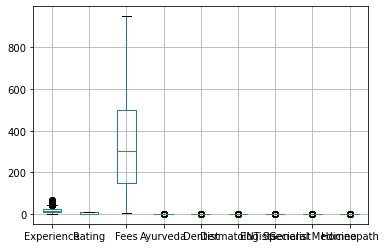

In [534]:
fee.boxplot()

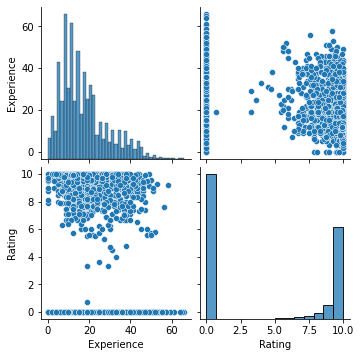

In [538]:
sns.pairplot(fee_new.iloc[:,:4])

* in pairplot we can see that points are distributed in a class form but this problem actually relats to regression problem.

In [539]:
fee_new.skew()

Experience              0.991089
Rating                  0.247186
Fees                    0.751870
Ayurveda                2.176749
Dentist                 1.254545
Dermatologists          1.725211
ENT Specialist          2.308676
General Medicine        1.525779
Homeopath               2.058645
 Bangalore              1.416677
 Chennai                2.035059
 Coimbatore             4.816241
 Delhi                  1.509849
 Ernakulam              6.000437
 Hyderabad              1.860027
 Mumbai                 1.465681
 Thiruvananthapuram     8.146287
unknown                15.046180
BDS                     1.293695
BHMS                    2.261706
BAMS                    2.229777
MBBS                    0.118000
MS                      0.566815
MD                      0.461151
DDVL                    5.836930
MDS                     2.234292
DDV                     4.231083
ENT                     3.071569
DGO                    18.650066
 Bangalore              1.416677
 Chennai  

in this we can experience column experiencing skewness, basically this happend beacuse doctors can have 0 to 66 yr of experience and most of them have as high as 17 yrs of exp.

<Figure size 432x288 with 0 Axes>

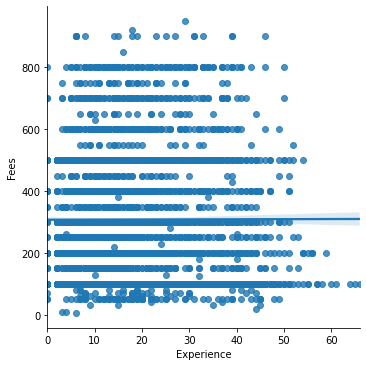

<Figure size 432x288 with 0 Axes>

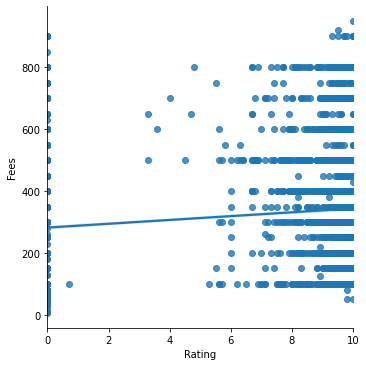

In [542]:
for i in fee[['Experience', 'Rating']]:
    plt.figure()
    sns.lmplot(x = i, y = 'Fees', data = fee_new)

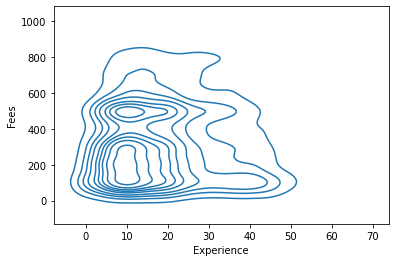

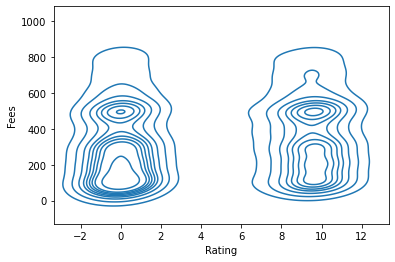

In [543]:
for i in fee[['Experience', 'Rating']]:
    plt.figure()
    sns.kdeplot(x = i, y = 'Fees', data = fee_new)

#### linear regression wont work in this situation as the regression nearly showing 0 or neutral regression due to presence of classes.

* most ratings lies between 0 to 2 and 7-10 and although the fee is same density estimation.
* most experienced doctors charging less fees as they are probably have less qualification or may not be a specialist or tend to charge low.

<AxesSubplot:xlabel='Experience', ylabel='Fees'>

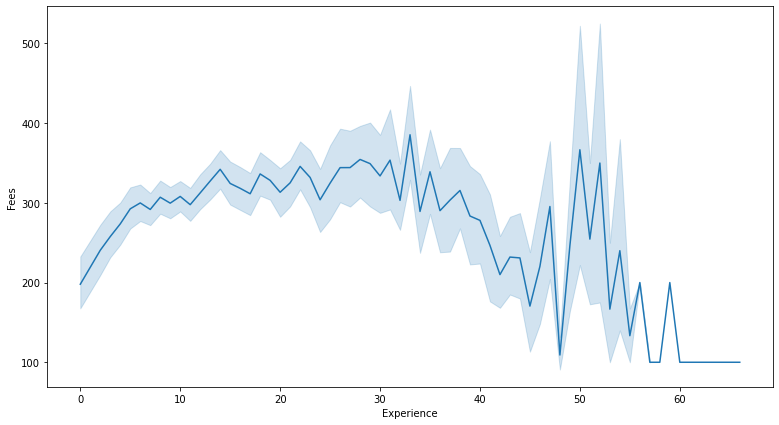

In [549]:
plt.figure(figsize=(13,7))
sns.lineplot(x = 'Experience', y = 'Fees', data = fee_new)

<AxesSubplot:ylabel='Density'>

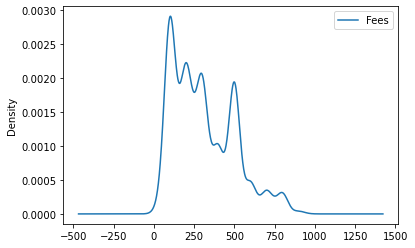

In [545]:
fee.plot.kde(y = 'Fees', x='Experience')

<AxesSubplot:>

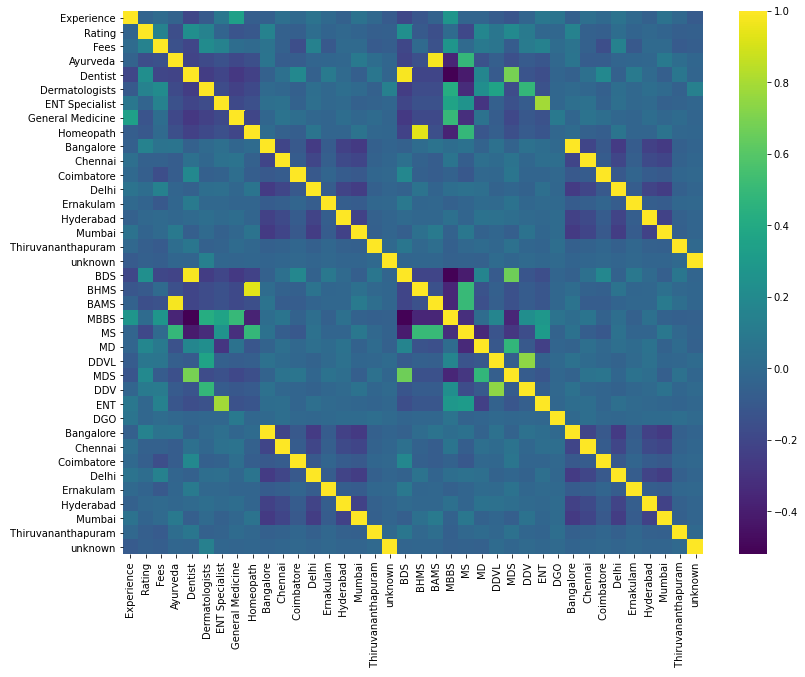

In [552]:
plt.figure(figsize = (13,10))
sns.heatmap(fee_new.corr(), cmap = 'viridis')

<AxesSubplot:xlabel='Rating', ylabel='Experience'>

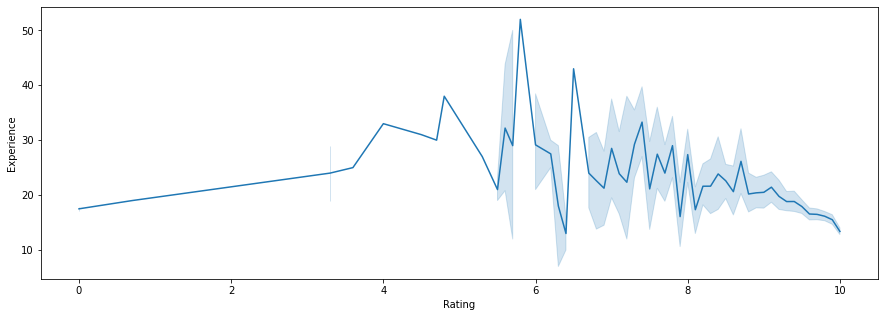

In [553]:
plt.figure(figsize = (15,5))
sns.lineplot(x = 'Rating', y='Experience', data = fee_new)

* less experienced doctors also have high ratings as they may be given by less people also or more number of people also who find the doctor parameters to be good.

<AxesSubplot:xlabel='Place', ylabel='Experience'>

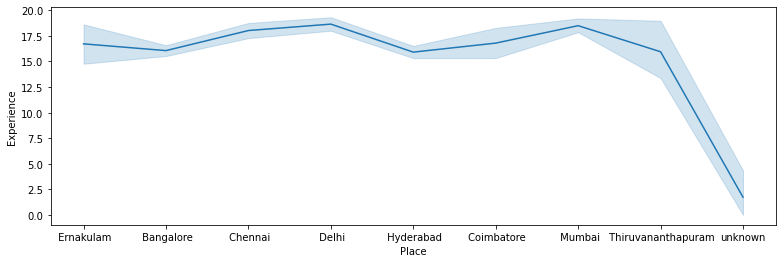

In [558]:
plt.figure(figsize=(13,4))
sns.lineplot(x= 'Place', y = 'Experience', data = fee)

* most place have doctors with mean experience of 17 years and unknown places have less experienced doctors

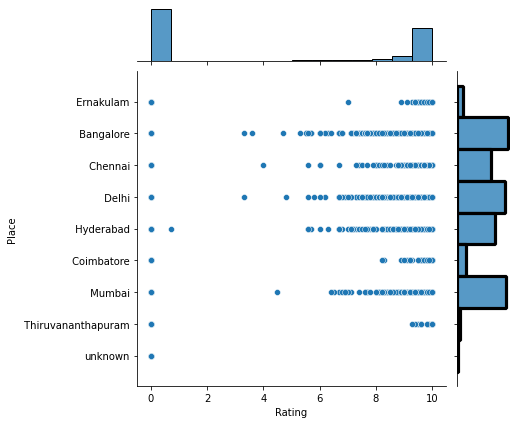

In [559]:
sns.jointplot(x = 'Rating', y='Place', data = fee)

In [564]:
fee_new.drop(['Qualification','Place','Miscellaneous_Info'], axis =1, inplace = True)

## model building

In [565]:
X = fee_new.drop('Fees', axis =1)
y = fee_new['Fees']

In [566]:
from sklearn.preprocessing import StandardScaler

In [600]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [601]:
x = scaler.transform(X)

In [567]:
from sklearn.model_selection import train_test_split

In [568]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=57)

In [572]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [573]:
lr = LinearRegression()
ls = Lasso()
rg = Ridge()
en = ElasticNet()
rfr = RandomForestRegressor()
svr = SVR()
dtr = DecisionTreeRegressor()
etr = ExtraTreeRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
knr = KNeighborsRegressor()

In [574]:
models = [lr,ls,rg,en,rfr,svr,dtr,etr,abr,gbr,knr]
for m in models:
    print(m)
    m.fit(X_train, y_train)
    pred_m = m.predict(X_test)
    print('MODEL REPORT')
    print('R2 SCORE:', r2_score(y_test, pred_m))
    print('MAE:', mean_absolute_error(y_test, pred_m))
    print('MSE:', mean_squared_error(y_test, pred_m))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_m)))
    print('\n')

LinearRegression()
MODEL REPORT
R2 SCORE: 0.20478263095434512
MAE: 135.6977861519731
MSE: 29192.242160038197
RMSE: 170.85737373621953


Lasso()
MODEL REPORT
R2 SCORE: 0.19426828234004
MAE: 137.29419374671275
MSE: 29578.221419108224
RMSE: 171.98320097936374


Ridge()
MODEL REPORT
R2 SCORE: 0.20475411734803162
MAE: 135.71384661743707
MSE: 29193.288887804418
RMSE: 170.86043687116225


ElasticNet()
MODEL REPORT
R2 SCORE: 0.12925268740444018
MAE: 145.35871058088918
MSE: 31964.928582983084
RMSE: 178.78738373549484


RandomForestRegressor()
MODEL REPORT
R2 SCORE: 0.014910371629244579
MAE: 144.90561859062942
MSE: 36162.40804102725
RMSE: 190.1641607691293


SVR()
MODEL REPORT
R2 SCORE: -0.005334993622669204
MAE: 152.03276360083484
MSE: 36905.61062695865
RMSE: 192.10833044654427


DecisionTreeRegressor()
MODEL REPORT
R2 SCORE: -0.5283545805297571
MAE: 170.32604811911216
MSE: 56105.53637022833
RMSE: 236.8660726449196


ExtraTreeRegressor()
MODEL REPORT
R2 SCORE: -0.5325050298036416
MAE: 170.06893

<AxesSubplot:title={'center':'Model Coefficients'}>

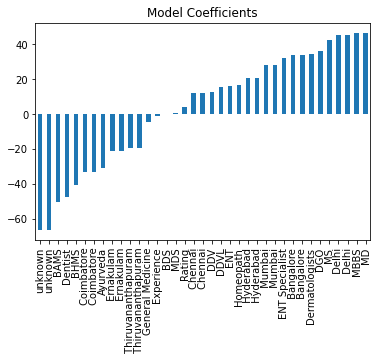

In [578]:
coef = pd.Series(lr.coef_,X.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

<AxesSubplot:title={'center':'Model Coefficients'}>

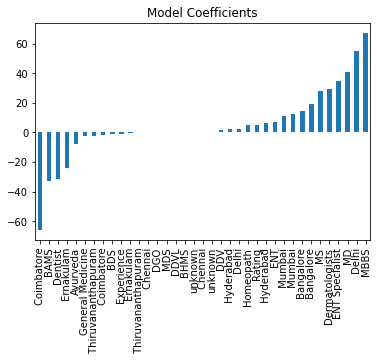

In [579]:
coef = pd.Series(ls.coef_,X.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

<AxesSubplot:title={'center':'Model Coefficients'}>

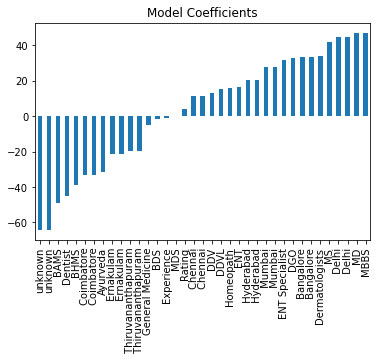

In [580]:
coef = pd.Series(rg.coef_,X.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

<AxesSubplot:title={'center':'Model Coefficients'}>

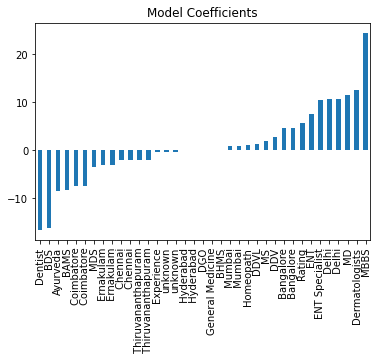

In [581]:
coef = pd.Series(en.coef_,X.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

In [583]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)
lg.score(X_train, y_train)
pred_lg = lg.predict(X_test)
print(r2_score(y_test,pred_lg))

-0.26331972245500657


In [595]:
x2 = fee_new.drop(['BAMS', 'Dentist', 'Fees'], axis = 1)

In [596]:
x2_train, x2_test, y_train, y_test = train_test_split(x2,y, test_size = .33, random_state = 57)

In [597]:
ls.fit(x2_train, y_train)
ls.score(x2_train, y_train)
pred_ls = ls.predict(x2_test)
print(r2_score(y_test,pred_ls))

0.193925430994775


<AxesSubplot:title={'center':'Model Coefficients'}>

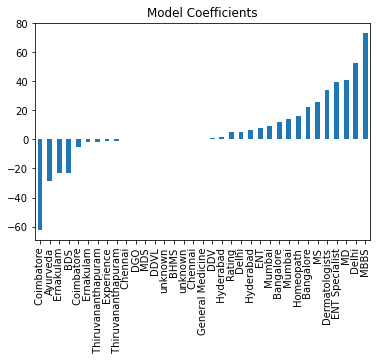

In [598]:
coef = pd.Series(ls.coef_,x2.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

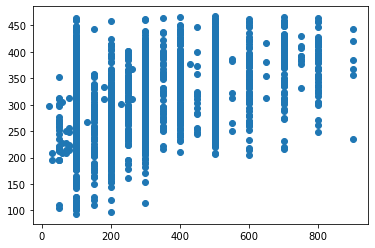

In [599]:
plt.scatter(y_test,pred_ls)

In [602]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=57)

In [603]:
models = [lr,ls,rg,en,rfr,svr,dtr,etr,abr,gbr,knr]
for m in models:
    print(m)
    m.fit(x_train, y_train)
    pred_m = m.predict(x_test)
    print('MODEL REPORT')
    print('R2 SCORE:', r2_score(y_test, pred_m))
    print('MAE:', mean_absolute_error(y_test, pred_m))
    print('MSE:', mean_squared_error(y_test, pred_m))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_m)))
    print('\n')

LinearRegression()
MODEL REPORT
R2 SCORE: 0.20478003463517347
MAE: 135.6971279685205
MSE: 29192.337470302955
RMSE: 170.85765265361383


Lasso()
MODEL REPORT
R2 SCORE: 0.20387075757157402
MAE: 135.9471644263674
MSE: 29225.716816962624
RMSE: 170.95530648962793


Ridge()
MODEL REPORT
R2 SCORE: 0.20478524676318854
MAE: 135.6976972103343
MSE: 29192.146134312185
RMSE: 170.85709272462816


ElasticNet()
MODEL REPORT
R2 SCORE: 0.19041291883604783
MAE: 137.992742232642
MSE: 29719.750904509907
RMSE: 172.394173058459


RandomForestRegressor()
MODEL REPORT
R2 SCORE: 0.014737241962100467
MAE: 144.8785698413546
MSE: 36168.76359029603
RMSE: 190.18087072651664


SVR()
MODEL REPORT
R2 SCORE: 0.08252296792816416
MAE: 142.5312050500457
MSE: 33680.36556929944
RMSE: 183.5221119355906


DecisionTreeRegressor()
MODEL REPORT
R2 SCORE: -0.5232547817100639
MAE: 169.970780503936
MSE: 55918.323957739616
RMSE: 236.47055621734307


ExtraTreeRegressor()
MODEL REPORT
R2 SCORE: -0.4926534680420298
MAE: 167.875082671957

## choosing best model

we will choose 
1. linear reg
2. lasso
3. ridge
4. elastic net
5. Gradient boost

for further validation

In [616]:
lr_param = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

ls_param = {
    'alpha':[0.001,0.01,0.1,0,1,10],
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'selection': ['cyclic', 'random']
}

rg_param = {
    'alpha':[0.001,0.01,0.1,0,1,10],
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

en_param = ls_param

gbr_param = {
    'loss': ['ls', 'lad', 'huber', 'quantile'],
    'n_estimators':[100,500],
    'criterion': ['friedman_mse', 'mse', 'mae']
}

In [610]:
gdsrlr = GridSearchCV(estimator=lr, param_grid= lr_param)
gdsrlr.fit(X_train,y_train)
print('best parameters:', gdsrlr.best_params_)
print('best score: ', gdsrlr.best_score_)

best parameters: {'fit_intercept': True, 'normalize': False}
best score:  0.16685250967235538


In [611]:
gdsrls = GridSearchCV(estimator=ls, param_grid= ls_param)
gdsrls.fit(X_train,y_train)
print('best parameters:', gdsrls.best_params_)
print('best score: ', gdsrls.best_score_)

best parameters: {'alpha': 0.01, 'fit_intercept': True, 'normalize': True, 'selection': 'cyclic'}
best score:  0.16730725972944233


In [612]:
gdsrrg = GridSearchCV(estimator=rg, param_grid= rg_param)
gdsrrg.fit(X_train,y_train)
print('best parameters:', gdsrrg.best_params_)
print('best score: ', gdsrrg.best_score_)

best parameters: {'alpha': 0.1, 'fit_intercept': True, 'normalize': True, 'solver': 'sparse_cg'}
best score:  0.16778482854568577


In [613]:
gdsren = GridSearchCV(estimator=en, param_grid= en_param)
gdsren.fit(X_train,y_train)
print('best parameters:', gdsren.best_params_)
print('best score: ', gdsren.best_score_)

best parameters: {'alpha': 0.01, 'fit_intercept': True, 'normalize': False, 'selection': 'cyclic'}
best score:  0.16764472623255655


In [617]:
gdsrgbr = GridSearchCV(estimator=gbr, param_grid= gbr_param)
gdsrgbr.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'n_estimators': [100, 500]})

In [618]:
print('best parameters:', gdsrgbr.best_params_)
print('best score: ', gdsrgbr.best_score_)

best parameters: {'criterion': 'mse', 'loss': 'ls', 'n_estimators': 100}
best score:  0.19180171107599225


In [644]:
gbr2 = GradientBoostingRegressor(criterion='mse', loss= 'ls', n_estimators= 100)
gbr2.fit(X_train, y_train)
pred_gbr2 = gbr2.predict(X_test)
print('R2 SCORE:', round(r2_score(y_test, pred_gbr2),2))
print('MAE:', mean_absolute_error(y_test, pred_gbr2))
print('MSE:', mean_squared_error(y_test, pred_gbr2))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_gbr2)))

R2 SCORE: 0.21
MAE: 134.6276231873688
MSE: 28932.362210025647
RMSE: 170.09515633910817


In [633]:
rdsr = RandomizedSearchCV(estimator=gbr, param_distributions=gbr_param)
rdsr.fit(X_train,y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'n_estimators': [100, 500]})

In [635]:
print(rdsr.best_params_)
print(rdsr.best_score_)

{'n_estimators': 100, 'loss': 'ls', 'criterion': 'friedman_mse'}
0.1919160711236999


In [641]:
rdsr = RandomizedSearchCV(estimator=ls, param_distributions=ls_param)
rdsr.fit(X_train,y_train)
print(rdsr.best_params_)
print(rdsr.best_score_)

{'selection': 'random', 'normalize': False, 'fit_intercept': False, 'alpha': 0.1}
0.1669953871365667


In [642]:
ls2 = Lasso(alpha=0.1, selection='random', normalize= False , fit_intercept= False)
ls2.fit(X_train, y_train)
pred_ls2 = ls2.predict(X_test)
print('R2 SCORE:', round(r2_score(y_test, pred_ls2),2))
print('MAE:', mean_absolute_error(y_test, pred_ls2))
print('MSE:', mean_squared_error(y_test, pred_ls2))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_ls2)))

R2 SCORE: 0.2
MAE: 135.74297853071104
MSE: 29213.03922147943
RMSE: 170.91822378400565


In [643]:
ls3 = Lasso(alpha=0.01, selection='cyclic', normalize= True , fit_intercept= True)
ls3.fit(X_train, y_train)
pred_ls2 = ls2.predict(X_test)
print('R2 SCORE:', round(r2_score(y_test, pred_ls2),2))
print('MAE:', mean_absolute_error(y_test, pred_ls2))
print('MSE:', mean_squared_error(y_test, pred_ls2))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_ls2)))

R2 SCORE: 0.2
MAE: 135.74297853071104
MSE: 29213.03922147943
RMSE: 170.91822378400565


In [639]:
gbr3 = GradientBoostingRegressor(criterion='friedman_mse', loss= 'ls', n_estimators= 100)
gbr3.fit(X_train, y_train)
pred_gbr3 = gbr3.predict(X_test)
print('R2 SCORE:', round(r2_score(y_test, pred_gbr3),2))
print('MAE:', mean_absolute_error(y_test, pred_gbr3))
print('MSE:', mean_squared_error(y_test, pred_gbr3))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_gbr3)))

R2 SCORE: 0.21
MAE: 134.62336741957623
MSE: 28931.688999776034
RMSE: 170.09317740513885


## best score and less error is given by gbr3

# saving the best model

In [646]:
import joblib
joblib.dump(gbr3, 'gbr3file.obj')

['gbr3file.obj']

### validating test set

In [619]:
test = pd.read_csv('test.csv')

In [620]:
test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [621]:
exp = []
for i in test['Experience']:
    exp.append(int(i.split()[0]))

test['Experience'] = exp

profile_df = pd.get_dummies(test['Profile'])

test = pd.concat([test,profile_df], axis =1 )

test['Rating'] = test['Rating'].fillna('0')
rating = []
for i in test['Rating']:
    rating.append(int(i.split('%')[0])/10)
test['Rating'] = rating

test['Place'] = test['Place'].fillna('unknown,unknown')
place=[]
for i in test['Place']:
    place.append(i.split(',').pop())
test['Place']=place

In [622]:
test['Place'].unique()

array([' Mumbai', ' Hyderabad', ' Chennai', ' Delhi', ' Bangalore',
       ' Coimbatore', ' Thiruvananthapuram', ' Ernakulam', 'unknown'],
      dtype=object)

In [623]:
test['Place'].replace(to_replace='e',value='unknown',inplace=True)

In [624]:
place_ = pd.get_dummies(test['Place'])

In [625]:
test_new = pd.concat([test,place_], axis =1 )
test_new.head(3)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Ayurveda,Dentist,Dermatologists,ENT Specialist,...,Homeopath,Bangalore,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram,unknown
0,MBBS,35,0.0,Mumbai,General Medicine,NaN,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0.0,Hyderabad,ENT Specialist,NaN,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,"MBBS, DDVL",40,7.0,Chennai,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [626]:
def seprator(lst,str):
    for data in col:
        if data.find(str) != -1:
            lst.append(int(1))
        else:
            lst.append(int(0))
            
col = test['Qualification']

bds = []
bhms = []
bams = []
mbbs = []
ms = []
md = []
ddvl = []
mds = []
ddv = []
ent = []
dgo = []

seprator(bds,'BDS')
seprator(bhms,'BHMS')
seprator(bams, 'BAMS')
seprator(mbbs, 'MBBS')
seprator(ms, 'MS')
seprator(md, 'MD')
seprator(ddvl, 'DDVL')
seprator(mds, 'MDS')
seprator(ddv, 'DDV')
seprator(ent, 'ENT')
seprator(dgo, 'DGO')

bds = pd.DataFrame(data = bds, columns = ['BDS'])
bhms = pd.DataFrame(data = bhms, columns = ['BHMS'])
bams = pd.DataFrame(data = bams, columns = ['BAMS'])
mbbs = pd.DataFrame(data = mbbs, columns = ['MBBS'])
ms = pd.DataFrame(data = ms, columns = ['MS'])
md = pd.DataFrame(data=md, columns=['MD'])
ddvl = pd.DataFrame(data=ddvl, columns=['DDVL'])
mds = pd.DataFrame(data = mds, columns=['MDS'])
ddv = pd.DataFrame(data=ddv, columns=['DDV'])
ent = pd.DataFrame(data=ent, columns= ['ENT'])
dgo = pd.DataFrame(data=dgo,columns= ['DGO'])

qual = pd.concat([bds,bhms,bams,mbbs,ms,md,ddvl,mds,ddv,ent,dgo], axis =1)
qual

,BDS,BHMS,BAMS,MBBS,MS,MD,DDVL,MDS,DDV,ENT,DGO
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,0,1,0,0
3,0,0,1,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1982,0,0,1,0,1,0,0,0,0,0,0
1983,0,0,0,1,0,1,0,0,0,0,0
1984,0,0,0,1,1,1,0,0,0,0,0
1985,1,0,0,0,0,0,0,0,0,0,0


In [627]:
test_new = pd.concat([test_new, qual, place_], axis =1)

In [629]:
test_new.drop(['Qualification','Place','Profile','Miscellaneous_Info'], axis = 1, inplace = True)

In [630]:
test_new.head(3)

,Experience,Rating,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Bangalore,Chennai,...,DGO,Bangalore,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram,unknown
0,35,0.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,31,0.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,40,7.0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [649]:
prediction = gbr3.predict(test_new)

In [652]:
gbr3_prediction = pd.DataFrame(prediction, columns=['Fees'])

In [656]:
gbr3_prediction.to_csv('gbr3_predns')

# --------------------------------------------- END ----------------------------------------------------------